## BARPLOT

### A bar chart or bar plot displays rectangular bars with lengths proportional to the (discrete) values that they represent.
### Discrete values can be ordinal values, numerical categoris, scores or an agrregated value (like avg) derived from continous numerical value

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
d=pd.read_csv("influence1.csv") #aggregate influence of all the universities in a country

In [4]:
d.head(5)

,country,InfluenceAggregate
0,USA,573
1,China,167
2,Japan,159
3,United Kingdom,144
4,Germany,115


In [5]:
d1=d[:8] #focus on first 8 rows
d1

,country,InfluenceAggregate
0,USA,573
1,China,167
2,Japan,159
3,United Kingdom,144
4,Germany,115
5,France,109
6,Italy,96
7,Spain,81


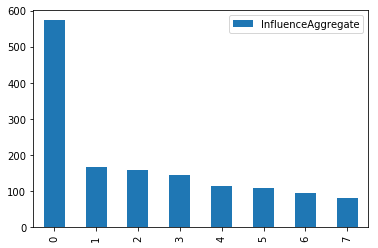

In [6]:
d1.plot.bar()

plt.show()

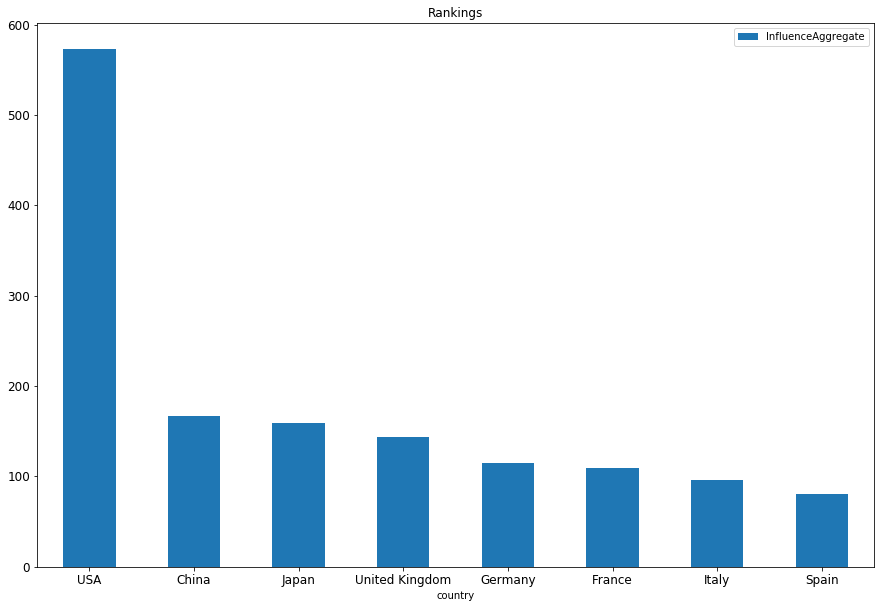

In [7]:
d1.set_index('country').plot.bar(rot=0, title='Rankings', figsize=(15,10), fontsize=12)

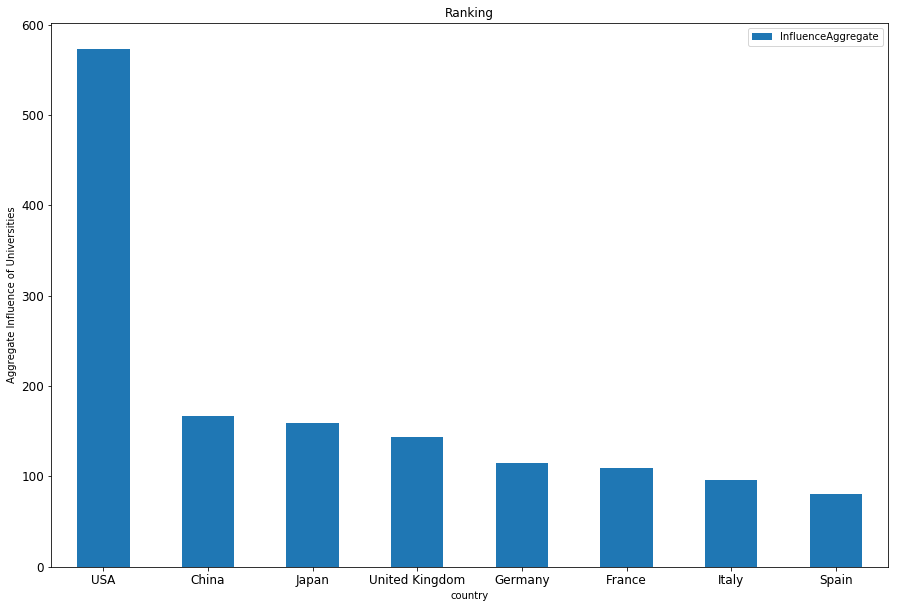

In [8]:
ax=d1.set_index('country').plot.bar(rot=0, title='Ranking', figsize=(15,10), fontsize=12)

# Set the y-axis label
ax.set_ylabel("Aggregate Influence of Universities")
plt.show()

### stacked barplot

In [9]:
df2 = pd.read_csv("happy2015.csv")
df2.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df3=df2[["Country","Family","Freedom","Generosity"]]

In [11]:
df3.head(4)

,Country,Family,Freedom,Generosity
0,Switzerland,1.34951,0.66557,0.29678
1,Iceland,1.40223,0.62877,0.43630
2,Denmark,1.36058,0.64938,0.34139
3,Norway,1.33095,0.66973,0.34699


In [ ]:
df3.plot.bar()

plt.show()

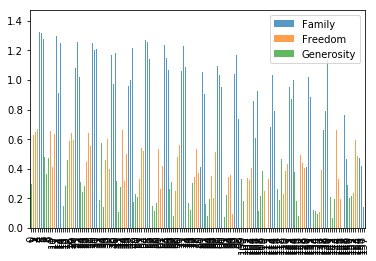

In [13]:
df3.plot(kind='bar',alpha=0.75)

### Barplots from aggregated values

In [14]:
from sklearn import datasets

In [15]:
iris=datasets.load_iris() #from sklearn 
iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['species'])
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species == 1.0,'versicolor','virginica'))
iris.columns = iris.columns.str.replace(' ','')

In [16]:
iris.head(5)

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
i = iris.mean() #take the average of all the measurements

In [18]:
i.head(5)

sepallength(cm)    5.843333
sepalwidth(cm)     3.054000
petallength(cm)    3.758667
petalwidth(cm)     1.198667
dtype: float64

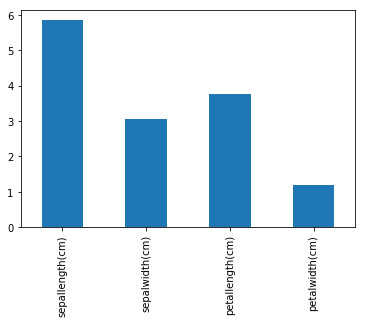

In [19]:
my_plot = i.plot(kind='bar') #plot the aggregated values as barplot


In [20]:
isa=iris.groupby(['species']).mean() #average of different measurements across species

In [21]:
isa

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [22]:
sd=iris.groupby(['species']).std() 
sd #standard deviation represents the variance in the data

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


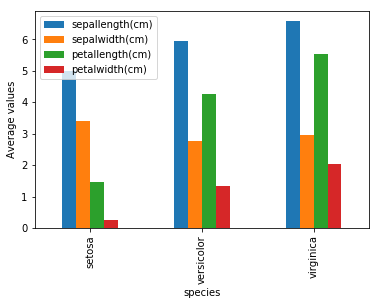

In [23]:
my_plot = isa.plot(kind='bar') #barplot of the average meaurement values for the 3 species
my_plot.set_ylabel("Average values")

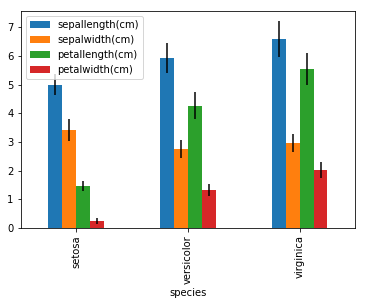

In [24]:
isa.plot(kind='bar', yerr=sd) #use sd as error bar
#Error bars are graphical representations of the variability of data 
#used on graphs to indicate the error or uncertainty in a reported measurement (such as mean)

### barplots with seaborn

In [26]:
import seaborn as sns

In [27]:
titanic = sns.load_dataset("titanic") #inbuilt sea born dataset

In [28]:
titanic.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


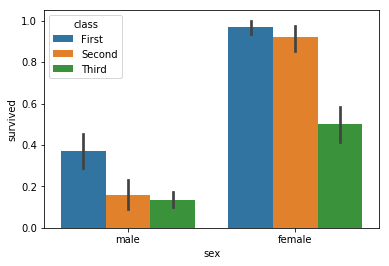

In [29]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

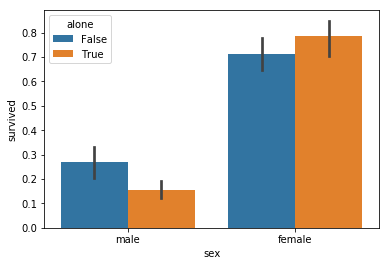

In [30]:
sns.barplot(x="sex", y="survived", hue="alone", data=titanic);